## ML4VA Project

## Step 1: Big Picture and Setup



This Machine Learning Project involves identifying food desert regions in Virginia. This is a classification task that will utilize three different models: Decision trees, Random Forest, and XGBost. We will analyze the overall performance of these models and determine any advantages or disadvantages of using certain classification models for this task.

With this project, we hope to be able to find key features that are responsible for the appearance of food deserts and be able to better identify problematic regions in the future to act and prevent them from occuring.

In [ ]:
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from scipy.stats import randint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import xgboost as xgb

## Step 2: Load the Data

In [ ]:
df_atlas = pd.read_csv('Food Access Research Atlas.csv')
df_health = pd.read_csv('PLACES__Census_Tract_Data__GIS_Friendly_Format___2021_release_20250324.csv')

In [ ]:
df_atlas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 81.3+ MB


In [ ]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72337 entries, 0 to 72336
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   StateAbbr               72337 non-null  object 
 1   StateDesc               72337 non-null  object 
 2   CountyName              72337 non-null  object 
 3   CountyFIPS              72337 non-null  int64  
 4   TractFIPS               72337 non-null  int64  
 5   TotalPopulation         72337 non-null  int64  
 6   ACCESS2_CrudePrev       70338 non-null  float64
 7   ACCESS2_Crude95CI       70338 non-null  object 
 8   ARTHRITIS_CrudePrev     70338 non-null  float64
 9   ARTHRITIS_Crude95CI     70338 non-null  object 
 10  BINGE_CrudePrev         70338 non-null  float64
 11  BINGE_Crude95CI         70338 non-null  object 
 12  BPHIGH_CrudePrev        70338 non-null  float64
 13  BPHIGH_Crude95CI        70338 non-null  object 
 14  BPMED_CrudePrev         70338 non-null

In [ ]:
df_us = pd.merge(df_atlas,df_health,left_on='CensusTract',right_on='TractFIPS',how='left')

In [ ]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Columns: 214 entries, CensusTract to Geolocation
dtypes: float64(159), int64(19), object(36)
memory usage: 118.4+ MB


In [ ]:
df_va = df_us[df_us['State'] == 'Virginia']

In [ ]:
df_va.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1886 entries, 67193 to 69078
Columns: 214 entries, CensusTract to Geolocation
dtypes: float64(159), int64(19), object(36)
memory usage: 3.1+ MB


In [ ]:
df_obe_missing = df_va[df_va['OBESITY_CrudePrev'].isnull()]

In [ ]:
df_obe_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 67201 to 68789
Columns: 214 entries, CensusTract to Geolocation
dtypes: float64(159), int64(19), object(36)
memory usage: 16.8+ KB


In [ ]:
df_va_cleaned = df_va[['CensusTract','Urban','Pop2010','OHU2010','NUMGQTRS','PCTGQTRS','LILATracts_halfAnd10','PovertyRate',
                    'MedianFamilyIncome','TractLOWI','TractKids','TractSeniors','TractWhite','TractBlack', 'County',
                    'TractAsian','TractNHOPI','TractAIAN','TractOMultir','TractHispanic','TractHUNV','TractSNAP','OBESITY_CrudePrev',
                    'HIGHCHOL_CrudePrev']].copy()

In [ ]:
df_va_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1886 entries, 67193 to 69078
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CensusTract           1886 non-null   int64  
 1   Urban                 1886 non-null   int64  
 2   Pop2010               1886 non-null   int64  
 3   OHU2010               1886 non-null   int64  
 4   NUMGQTRS              1885 non-null   float64
 5   PCTGQTRS              1885 non-null   float64
 6   LILATracts_halfAnd10  1886 non-null   int64  
 7   PovertyRate           1886 non-null   float64
 8   MedianFamilyIncome    1861 non-null   float64
 9   TractLOWI             1886 non-null   float64
 10  TractKids             1886 non-null   float64
 11  TractSeniors          1886 non-null   float64
 12  TractWhite            1886 non-null   float64
 13  TractBlack            1886 non-null   float64
 14  County                1886 non-null   object 
 15  TractAsian           

In [ ]:
df_va_missing = df_va_cleaned[df_va_cleaned.isnull().any(axis=1)]

In [ ]:
df_va_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 67201 to 68999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CensusTract           26 non-null     int64  
 1   Urban                 26 non-null     int64  
 2   Pop2010               26 non-null     int64  
 3   OHU2010               26 non-null     int64  
 4   NUMGQTRS              25 non-null     float64
 5   PCTGQTRS              25 non-null     float64
 6   LILATracts_halfAnd10  26 non-null     int64  
 7   PovertyRate           26 non-null     float64
 8   MedianFamilyIncome    1 non-null      float64
 9   TractLOWI             26 non-null     float64
 10  TractKids             26 non-null     float64
 11  TractSeniors          26 non-null     float64
 12  TractWhite            26 non-null     float64
 13  TractBlack            26 non-null     float64
 14  County                26 non-null     object 
 15  TractAsian            2

In [ ]:
df_va_cleaned.dropna(inplace=True)

In [ ]:
df_va_cleaned.head(10)

,CensusTract,Urban,Pop2010,OHU2010,NUMGQTRS,PCTGQTRS,LILATracts_halfAnd10,PovertyRate,MedianFamilyIncome,TractLOWI,...,County,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,OBESITY_CrudePrev,HIGHCHOL_CrudePrev
67193,51001090100,0,2941,1417,16.0,0.54,0,9.1,61033.0,803.0,...,Accomack County,17.0,0.0,8.0,89.0,49.0,109.0,129.0,33.9,38.0
67194,51001090200,0,6156,2630,15.0,0.24,0,13.4,48438.0,1993.0,...,Accomack County,39.0,13.0,25.0,192.0,179.0,158.0,406.0,39.0,34.2
67195,51001090300,0,2335,960,0.0,0.00,0,22.6,39306.0,1398.0,...,Accomack County,9.0,2.0,3.0,143.0,152.0,34.0,224.0,41.2,36.1
67196,51001090400,0,6234,2225,296.0,4.75,0,29.2,52899.0,3608.0,...,Accomack County,30.0,10.0,24.0,742.0,1486.0,341.0,401.0,44.7,33.2
67197,51001090500,0,2849,1141,10.0,0.35,0,24.5,56111.0,988.0,...,Accomack County,27.0,7.0,25.0,276.0,405.0,129.0,115.0,41.4,34.0
67198,51001090600,0,4401,2022,31.0,0.70,1,16.3,56893.0,1260.0,...,Accomack County,25.0,4.0,10.0,106.0,111.0,243.0,135.0,36.2,37.3
67199,51001090700,0,4907,2018,8.0,0.16,0,13.1,67262.0,2166.0,...,Accomack County,27.0,4.0,28.0,136.0,193.0,159.0,273.0,39.6,35.4
67200,51001090800,0,3336,1384,52.0,1.56,0,32.1,52273.0,2055.0,...,Accomack County,9.0,0.0,12.0,157.0,275.0,179.0,237.0,44.5,35.5
67202,51003010100,0,5190,1978,134.0,2.58,0,8.5,104861.0,976.0,...,Albemarle County,52.0,1.0,8.0,115.0,85.0,27.0,27.0,28.5,34.9
67203,51003010201,0,4664,1726,5.0,0.11,0,2.5,96136.0,617.0,...,Albemarle County,94.0,0.0,17.0,201.0,172.0,0.0,43.0,27.9,32.1


In [ ]:
df_va_cleaned.to_csv('VA_Merged_Cleaned.csv')

## Step 3: Discover and visualize the data to gain insights

In [ ]:
df = pd.read_csv('VA_Merged_Cleaned.csv')

In [ ]:
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("CensusTract", axis=1)
df = df.drop("County", axis=1)

In [ ]:
df.describe()

,Urban,Pop2010,OHU2010,NUMGQTRS,PCTGQTRS,LILATracts_halfAnd10,PovertyRate,MedianFamilyIncome,TractLOWI,TractKids,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,OBESITY_CrudePrev,HIGHCHOL_CrudePrev
count,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,...,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000
mean,0.725806,4274.601613,1638.420968,112.451613,2.603978,0.283871,11.765699,92710.089247,1112.034946,994.687097,...,826.423118,235.123656,3.196774,15.652151,261.221505,338.720968,103.816129,145.412903,32.391129,31.267151
std,0.446227,1736.648427,650.905365,593.122326,9.368365,0.450996,10.185985,46332.483972,779.447964,518.707548,...,912.968961,364.139326,4.926680,16.775516,301.104834,475.034312,115.567424,139.334588,6.378374,4.918958
min,0.000000,367.000000,27.000000,0.000000,0.000000,0.000000,0.000000,9762.000000,0.000000,23.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,17.800000,8.500000
25%,0.000000,3031.500000,1166.750000,0.000000,0.000000,0.000000,4.600000,58253.750000,512.750000,609.000000,...,203.250000,22.000000,0.000000,7.000000,88.000000,84.000000,27.000000,40.000000,27.575000,28.300000
50%,1.000000,4093.500000,1575.000000,3.000000,0.050000,0.000000,8.900000,79651.500000,955.500000,915.000000,...,505.500000,86.000000,2.000000,12.000000,168.500000,182.000000,65.000000,107.500000,32.500000,31.900000
75%,1.000000,5393.500000,2061.500000,41.000000,0.960000,1.000000,16.300000,114743.250000,1533.250000,1301.250000,...,1144.500000,289.500000,4.000000,20.000000,314.000000,391.250000,139.250000,206.250000,36.400000,35.000000
max,1.000000,22065.000000,4271.000000,19496.000000,97.640000,1.000000,82.800000,250001.000000,5531.000000,4356.000000,...,7730.000000,3996.000000,74.000000,373.000000,2819.000000,4868.000000,944.000000,966.000000,54.400000,47.400000


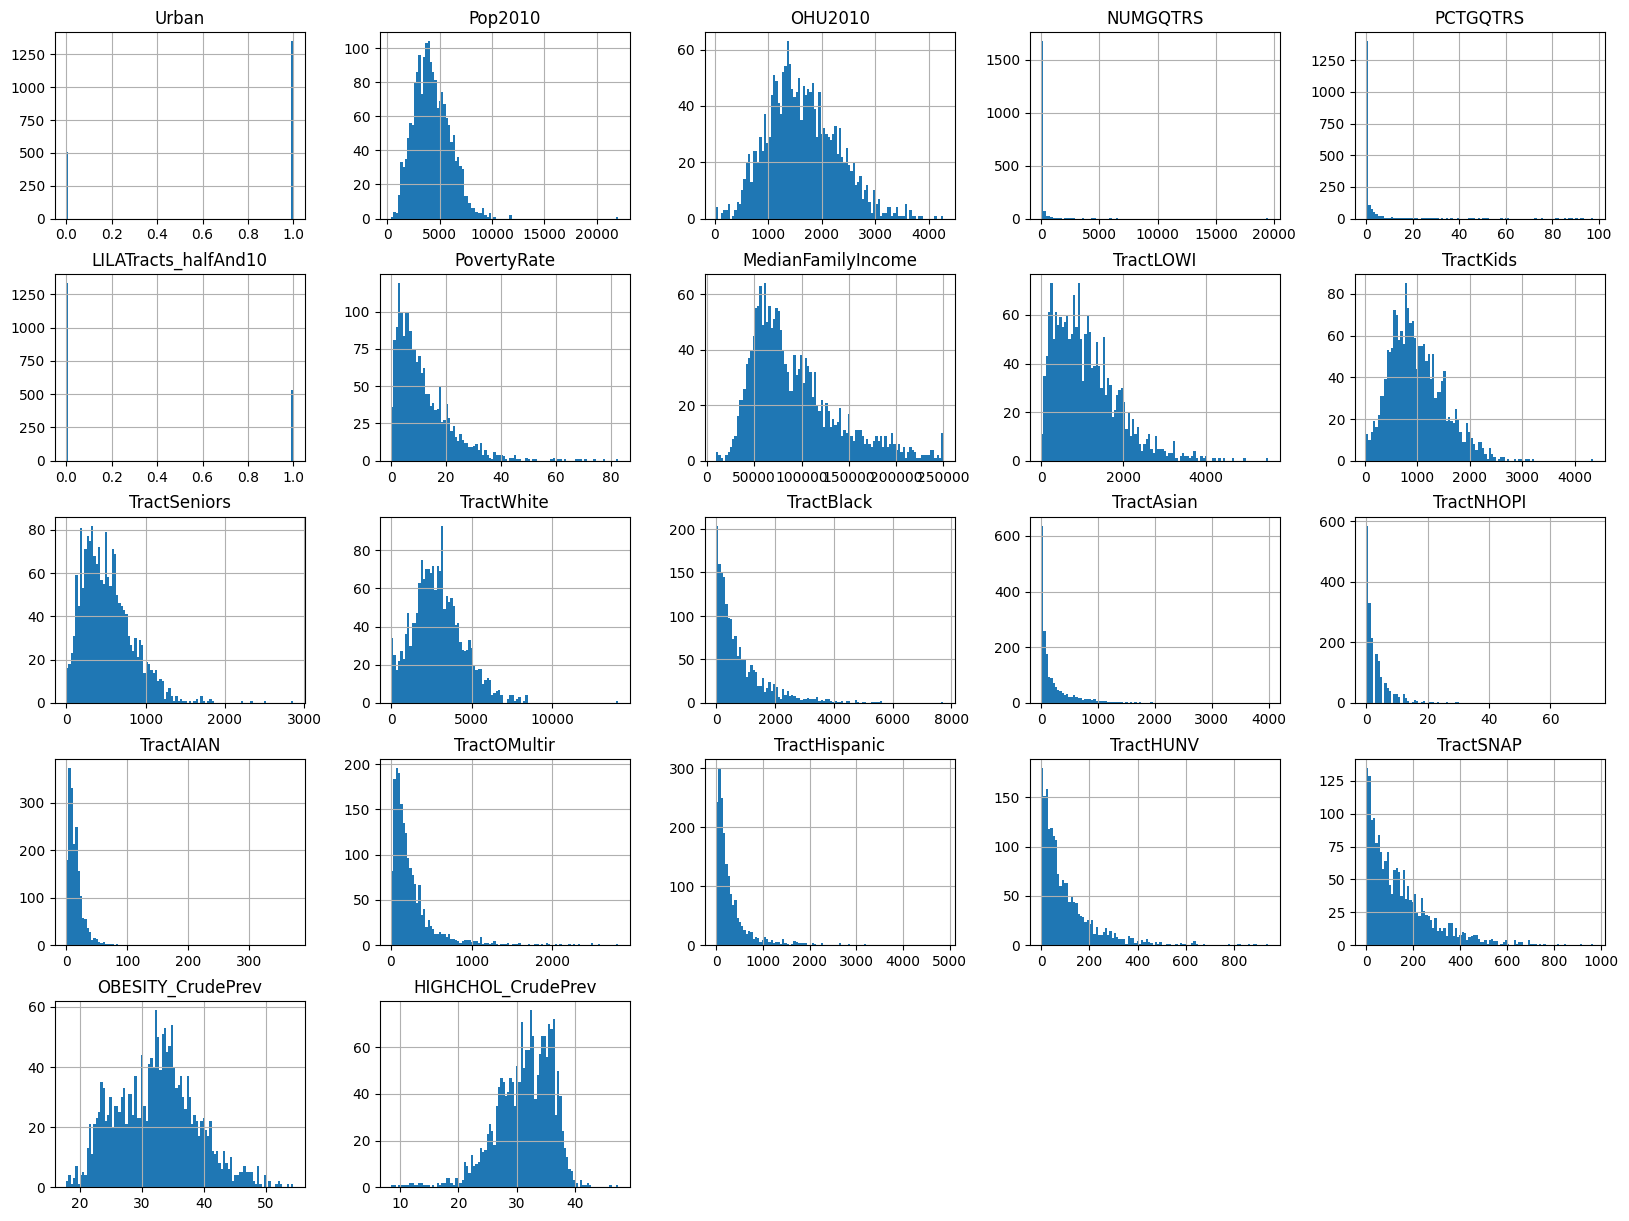

In [ ]:
%matplotlib inline
df.hist(bins=100, figsize=(20,15))
plt.show()

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["LILATracts_halfAnd10"]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]

In [ ]:
print(df_train["LILATracts_halfAnd10"].value_counts() / len(df_train))
print(df_test["LILATracts_halfAnd10"].value_counts() / len(df_test))
print(df["LILATracts_halfAnd10"].value_counts() / len(df))

LILATracts_halfAnd10
0    0.716398
1    0.283602
Name: count, dtype: float64
LILATracts_halfAnd10
0    0.715054
1    0.284946
Name: count, dtype: float64
LILATracts_halfAnd10
0    0.716129
1    0.283871
Name: count, dtype: float64


In [ ]:
df_train_X = df_train.drop("LILATracts_halfAnd10", axis=1)
df_train_Y = df_train["LILATracts_halfAnd10"].copy()
df_test_X = df_test.drop("LILATracts_halfAnd10", axis=1)
df_test_Y = df_test["LILATracts_halfAnd10"].copy()

In [ ]:
sum(df_test_Y)

106

##  Step 4: Data Preparation and Cleaning

In [ ]:
df_train_X.head()

,Urban,Pop2010,OHU2010,NUMGQTRS,PCTGQTRS,PovertyRate,MedianFamilyIncome,TractLOWI,TractKids,TractSeniors,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,OBESITY_CrudePrev,HIGHCHOL_CrudePrev
1228,1,4893,2187,0.0,0.00,4.5,85909.0,777.0,1018.0,980.0,...,439.0,152.0,10.0,18.0,214.0,219.0,51.0,91.0,30.3,34.5
652,0,2862,1019,0.0,0.00,0.4,95125.0,466.0,714.0,319.0,...,157.0,13.0,1.0,13.0,49.0,54.0,16.0,16.0,35.2,34.2
1306,1,8638,3588,0.0,0.00,10.0,77760.0,1890.0,2173.0,893.0,...,3163.0,299.0,1.0,30.0,419.0,356.0,71.0,290.0,36.0,30.2
1742,0,1397,551,0.0,0.00,5.5,71719.0,183.0,262.0,199.0,...,189.0,2.0,1.0,6.0,37.0,17.0,28.0,17.0,32.9,36.0
695,1,5759,2505,19.0,0.33,26.5,36179.0,2812.0,1531.0,371.0,...,4729.0,117.0,1.0,12.0,254.0,261.0,166.0,384.0,38.5,25.2


In [ ]:
numericals = list(df_train_X.drop(['Urban'], axis=1).columns)
categoricals = ['Urban']

full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), numericals),
    ('cat', OneHotEncoder(), categoricals),
])

Fitting both because we'll need it for all our models, later.

In [ ]:
df_train_prepped_X = full_pipeline.fit_transform(df_train_X)
df_test_prepped_X = full_pipeline.fit_transform(df_test_X)

In [ ]:
#i actually sat here for 20 minutes figuring out why it was missing a column before i realized it's because we one-hot encoded rural/urban
features_list = ['Pop2010','OHU2010','NUMGQTRS','PCTGQTRS','PovertyRate',
                    'MedianFamilyIncome','TractLOWI','TractKids','TractSeniors','TractWhite','TractBlack',
                    'TractAsian','TractNHOPI','TractAIAN','TractOMultir','TractHispanic','TractHUNV','TractSNAP','OBESITY_CrudePrev',
                    'HIGHCHOL_CrudePrev', 'Rural', 'Urban']

## Step 5: Model Selection + Tuning

### Model 1: Decision Tree


In [ ]:
dec_tree = DecisionTreeClassifier(random_state=817251130)

In [ ]:
param_grid = {'max_depth': range(3,15), 'min_samples_split': range(2,10), 'min_samples_leaf': range(1, 5)}
grid_search = GridSearchCV(dec_tree, param_grid, cv=5, scoring='f1')

In [ ]:
grid_search.fit(df_train_prepped_X, df_train_Y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=817251130),
             param_grid={'max_depth': range(3, 15),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)},
             scoring='f1')

In [ ]:
best_dec_tree = grid_search.best_estimator_

In [ ]:
y_pred = best_dec_tree.predict(df_test_prepped_X)

In [ ]:
cm = confusion_matrix(df_test_Y, y_pred)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

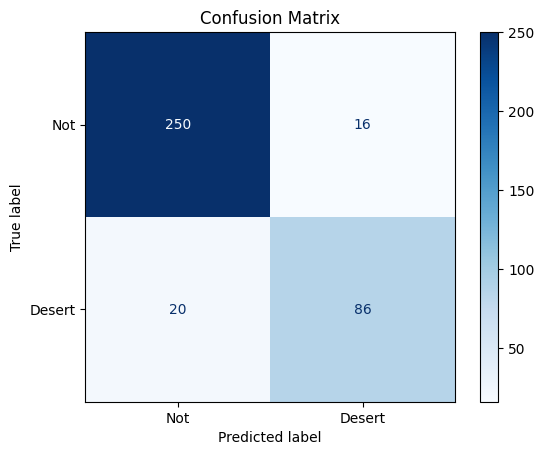

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not', 'Desert'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
precision_score(df_test_Y, y_pred)

0.8431372549019608

In [ ]:
recall_score(df_test_Y, y_pred)

0.8113207547169812

In [ ]:
f1_score(df_test_Y, y_pred)

0.8269230769230769

In [ ]:
dec_tree_importance = best_dec_tree.feature_importances_

In [ ]:
for i, s in enumerate(dec_tree_importance):
  print(f'Feature: {features_list[i]}, importance: {s}')

Feature: Pop2010, importance: 0.012593321301237694
Feature: OHU2010, importance: 0.0
Feature: NUMGQTRS, importance: 0.0
Feature: PCTGQTRS, importance: 0.009794801012690311
Feature: PovertyRate, importance: 0.05459020563852076
Feature: MedianFamilyIncome, importance: 0.4754459798944778
Feature: TractLOWI, importance: 0.0
Feature: TractKids, importance: 0.005737243981606835
Feature: TractSeniors, importance: 0.009408524509513672
Feature: TractWhite, importance: 0.0034793268154832495
Feature: TractBlack, importance: 0.013574968100743386
Feature: TractAsian, importance: 0.01765113196787748
Feature: TractNHOPI, importance: 0.0035455997072067398
Feature: TractAIAN, importance: 0.0
Feature: TractOMultir, importance: 0.06886036838381739
Feature: TractHispanic, importance: 0.03233549687264971
Feature: TractHUNV, importance: 0.00559843030024291
Feature: TractSNAP, importance: 0.014502477842395051
Feature: OBESITY_CrudePrev, importance: 0.017465255357347668
Feature: HIGHCHOL_CrudePrev, importance

### Model 2: Random Forest

In [ ]:
random_forest = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {'n_estimators': randint(10, 200), 'max_depth': [5, 10, 15, 20], 'min_samples_split': randint(2, 11), 'min_samples_leaf': randint(1, 6)}
random_search = RandomizedSearchCV(random_forest, param_grid, n_iter=50, cv=5)

In [ ]:
random_search.fit(df_train_prepped_X, df_train_Y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e3369d35150>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e3369de4050>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e336a3a9610>})

In [ ]:
best_random_forest = random_search.best_estimator_

In [ ]:
y_pred = best_random_forest.predict(df_test_prepped_X)

In [ ]:
confusion_matrix(df_test_Y, y_pred)

array([[257,   9],
       [ 18,  88]])

In [ ]:
precision_score(df_test_Y, y_pred)

0.9072164948453608

In [ ]:
recall_score(df_test_Y, y_pred)

0.8301886792452831

In [ ]:
f1_score(df_test_Y, y_pred)

0.8669950738916257

In [ ]:
random_forest_importance = best_random_forest.feature_importances_

In [ ]:
for i, s in enumerate(random_forest_importance):
  print(f'Feature: {features_list[i]}, importance: {s}')

Feature: Pop2010, importance: 0.018078861903402205
Feature: OHU2010, importance: 0.018210820022717022
Feature: NUMGQTRS, importance: 0.012018962560191302
Feature: PCTGQTRS, importance: 0.012542152752829584
Feature: PovertyRate, importance: 0.12598540801729483
Feature: MedianFamilyIncome, importance: 0.20724874117641753
Feature: TractLOWI, importance: 0.05352652360512075
Feature: TractKids, importance: 0.01937027178962652
Feature: TractSeniors, importance: 0.021430730445225532
Feature: TractWhite, importance: 0.037159511979598325
Feature: TractBlack, importance: 0.05564006236110463
Feature: TractAsian, importance: 0.0309722089538469
Feature: TractNHOPI, importance: 0.010680244201586723
Feature: TractAIAN, importance: 0.020531420514443087
Feature: TractOMultir, importance: 0.03613285852729957
Feature: TractHispanic, importance: 0.03465363689322868
Feature: TractHUNV, importance: 0.03412765507142641
Feature: TractSNAP, importance: 0.05819253527700179
Feature: OBESITY_CrudePrev, importance

### Model 3: XGBoost

In [ ]:
xgboost = xgb.XGBClassifier()

In [ ]:
param_grid = {'max_depth': range(3,10), 'subsample':[0.5, 0.75, 1], 'scale_pos_weight': [1, 1.5, 2, 2.5, 3.0]}
#also tried: max_delta_step, min_child_weight & gamma but those ended up being the same as XGBoost defaults of 0, 1, and 0
grid_search = GridSearchCV(xgboost, param_grid, cv=5, scoring='f1')

In [ ]:
grid_search.fit(df_train_prepped_X, df_train_Y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': range(3, 10),
                         'scale_pos_weight': [1, 1.5, 2, 2.5, 3.0],
                         'subsample': [0.5, 0.75, 1]},
             scoring='f1')

In [ ]:
grid_search.best_params_

{'max_depth': 8, 'scale_pos_weight': 2.5, 'subsample': 1}

In [ ]:
best_xgboost = grid_search.best_estimator_

In [ ]:
y_pred = best_xgboost.predict(df_test_prepped_X)

In [ ]:
confusion_matrix(df_test_Y, y_pred)

array([[249,  17],
       [ 18,  88]])

In [ ]:
precision_score(df_test_Y, y_pred)

0.8380952380952381

In [ ]:
recall_score(df_test_Y, y_pred)

0.8301886792452831

In [ ]:
f1_score(df_test_Y, y_pred)

0.8341232227488151

In [ ]:
xgboost_importance = best_xgboost.feature_importances_

In [ ]:
for i, s in enumerate(xgboost_importance):
  print(f'Feature: {features_list[i]}, importance: {s}')

Feature: Pop2010, importance: 0.024025578051805496
Feature: OHU2010, importance: 0.019904837012290955
Feature: NUMGQTRS, importance: 0.01982194185256958
Feature: PCTGQTRS, importance: 0.018747659400105476
Feature: PovertyRate, importance: 0.06712609529495239
Feature: MedianFamilyIncome, importance: 0.26665014028549194
Feature: TractLOWI, importance: 0.016348818317055702
Feature: TractKids, importance: 0.016932902857661247
Feature: TractSeniors, importance: 0.02071738988161087
Feature: TractWhite, importance: 0.01513397041708231
Feature: TractBlack, importance: 0.021809712052345276
Feature: TractAsian, importance: 0.021060215309262276
Feature: TractNHOPI, importance: 0.020511388778686523
Feature: TractAIAN, importance: 0.02055700682103634
Feature: TractOMultir, importance: 0.0706261545419693
Feature: TractHispanic, importance: 0.06148252636194229
Feature: TractHUNV, importance: 0.015108161605894566
Feature: TractSNAP, importance: 0.016972800716757774
Feature: OBESITY_CrudePrev, importan

##Model 4: SVM

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
def get_metrics(model):
    print("best param:", model.best_params_)
    print("best score:", model.best_score_)

    y_pred = model.best_estimator_.predict(df_test_prepped_X)

    precision = precision_score(df_test_Y, y_pred)
    recall = recall_score(df_test_Y, y_pred)
    f1 = f1_score(df_test_Y, y_pred)

    print("precision:", precision)
    print("recall:", recall)
    print("f1 score:", f1)

    cm = confusion_matrix(df_test_Y, y_pred)
    print(confusion_matrix(df_test_Y, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

poly = make_pipeline(StandardScaler(), SVC(kernel='poly'))
param_grid_poly = {'svc__C': list(range(1,20)), 'svc__coef0' : [0, 1, 3, 5, 10]}
grid_poly= GridSearchCV(poly, param_grid_poly, cv=5)
grid_poly.fit(df_train_prepped_X, df_train_Y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(kernel='poly'))]),
             param_grid={'svc__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                    14, 15, 16, 17, 18, 19],
                         'svc__coef0': [0, 1, 3, 5, 10]})

In [ ]:
get_metrics(grid_poly)

best param: {'svc__C': 1, 'svc__coef0': 1}
best score: 0.8870946602490226
precision: 0.8252427184466019
recall: 0.8018867924528302
f1 score: 0.8133971291866029
[[248  18]
 [ 21  85]]


In [ ]:
from sklearn.inspection import permutation_importance

#approximation via permutation importance
best_svc = grid_poly.best_estimator_
perm_imp = permutation_importance(
    best_svc, df_train_prepped_X, df_train_Y,
    n_repeats=10, random_state=42, n_jobs=-1
)
feat_imp = pd.Series(perm_imp.importances_mean,
                     index=features_list).sort_values(ascending=False)

for i, s in enumerate(perm_imp.importances_mean):
    print(f"Feature: {features_list[i]}, importance: {s}")

Feature: Pop2010, importance: 0.006586021505376372
Feature: OHU2010, importance: 0.006518817204301097
Feature: NUMGQTRS, importance: 0.00443548387096776
Feature: PCTGQTRS, importance: 0.00208333333333337
Feature: PovertyRate, importance: 0.040524193548387086
Feature: MedianFamilyIncome, importance: 0.12130376344086025
Feature: TractLOWI, importance: 0.013104838709677446
Feature: TractKids, importance: 0.008131720430107537
Feature: TractSeniors, importance: 0.004771505376344099
Feature: TractWhite, importance: 0.004368279569892497
Feature: TractBlack, importance: 0.008266129032258096
Feature: TractAsian, importance: 0.012970430107526887
Feature: TractNHOPI, importance: 0.003091397849462385
Feature: TractAIAN, importance: 0.008938172043010784
Feature: TractOMultir, importance: 0.028965053763440864
Feature: TractHispanic, importance: 0.011827956989247313
Feature: TractHUNV, importance: 0.010080645161290336
Feature: TractSNAP, importance: 0.006653225806451635
Feature: OBESITY_CrudePrev, im

In [ ]:
rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma=0.1))
param_grid_rbf = {'svc__C': [1, 5, 10, 50, 100, 500, 750, 1000]}
grid_rbf= GridSearchCV(rbf, param_grid_rbf, cv=5, scoring='f1')
grid_rbf.fit(df_train_prepped_X, df_train_Y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(gamma=0.1))]),
             param_grid={'svc__C': [1, 5, 10, 50, 100, 500, 750, 1000]},
             scoring='f1')

In [ ]:
get_metrics(grid_rbf)

best param: {'svc__C': 1}
best score: 0.7685542095626129
precision: 0.84
recall: 0.7924528301886793
f1 score: 0.8155339805825242
[[250  16]
 [ 22  84]]


In [ ]:
best_svc = grid_rbf.best_estimator_
perm_imp = permutation_importance(
    best_svc, df_train_prepped_X, df_train_Y,
    n_repeats=10, random_state=42, n_jobs=-1
)
feat_imp = pd.Series(perm_imp.importances_mean,
                     index=features_list).sort_values(ascending=False)

for i, s in enumerate(perm_imp.importances_mean):
    print(f"Feature: {features_list[i]}, importance: {s}")

Feature: Pop2010, importance: 0.006518817204301097
Feature: OHU2010, importance: 0.004166666666666685
Feature: NUMGQTRS, importance: 0.012096774193548399
Feature: PCTGQTRS, importance: 0.012500000000000022
Feature: PovertyRate, importance: 0.016263440860215063
Feature: MedianFamilyIncome, importance: 0.051881720430107546
Feature: TractLOWI, importance: 0.012029569892473124
Feature: TractKids, importance: 0.006518817204301097
Feature: TractSeniors, importance: 0.005645161290322586
Feature: TractWhite, importance: 0.004771505376344109
Feature: TractBlack, importance: 0.006787634408602172
Feature: TractAsian, importance: 0.011290322580645173
Feature: TractNHOPI, importance: 0.006384408602150537
Feature: TractAIAN, importance: 0.0047715053763441205
Feature: TractOMultir, importance: 0.015994623655913986
Feature: TractHispanic, importance: 0.014247311827956998
Feature: TractHUNV, importance: 0.010954301075268836
Feature: TractSNAP, importance: 0.011357526881720436
Feature: OBESITY_CrudePrev

##Additional Analysis on Best Model (Random Forest)

In [ ]:
y_pred = best_random_forest.predict(df_test_prepped_X)

In [ ]:
not_missed = np.where(df_test_Y == y_pred)

In [ ]:
not_missed_ind = not_missed[0]

In [ ]:
not_missed_ind

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  26,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  77,  78,  79,  81,  82,
        83,  84,  85,  86,  87,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110,
       111, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 19

In [ ]:
correct = np.take(df_test_X, not_missed_ind, axis=0)

In [ ]:
missed = np.where(df_test_Y != y_pred)

In [ ]:
missed_ind = missed[0]

In [ ]:
misclassed = np.take(df_test_X, missed_ind, axis=0)
misclassed

,Urban,Pop2010,OHU2010,NUMGQTRS,PCTGQTRS,PovertyRate,MedianFamilyIncome,TractLOWI,TractKids,TractSeniors,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,OBESITY_CrudePrev,HIGHCHOL_CrudePrev
622,0,5164,2139,16.0,0.31,24.1,41607.0,2352.0,1144.0,994.0,...,1880.0,10.0,2.0,13.0,47.0,48.0,95.0,321.0,38.9,36.2
1656,1,3724,1819,13.0,0.35,27.8,100625.0,1334.0,221.0,152.0,...,560.0,165.0,1.0,14.0,167.0,132.0,229.0,165.0,23.7,18.6
940,1,7656,3198,0.0,0.00,8.0,92051.0,1942.0,1770.0,394.0,...,1994.0,674.0,7.0,97.0,1057.0,1672.0,38.0,161.0,30.7,25.7
1636,1,1630,674,0.0,0.00,28.4,48750.0,686.0,334.0,275.0,...,1519.0,4.0,0.0,7.0,35.0,12.0,135.0,105.0,42.3,34.1
1695,1,1204,426,582.0,48.34,20.7,114464.0,305.0,44.0,25.0,...,318.0,23.0,0.0,2.0,19.0,36.0,54.0,5.0,31.1,21.1
115,0,5939,2260,256.0,4.31,17.6,67569.0,1983.0,1215.0,950.0,...,168.0,22.0,0.0,31.0,74.0,62.0,154.0,155.0,35.7,37.3
1238,1,3777,2214,0.0,0.00,12.4,66250.0,1278.0,438.0,219.0,...,2016.0,321.0,2.0,6.0,245.0,275.0,180.0,65.0,32.7,27.2
1243,1,3103,1442,0.0,0.00,8.9,80250.0,811.0,572.0,158.0,...,979.0,292.0,3.0,29.0,316.0,484.0,70.0,46.0,27.2,23.3
1103,0,2882,1130,0.0,0.00,9.4,63214.0,932.0,689.0,453.0,...,1268.0,3.0,0.0,26.0,73.0,41.0,45.0,162.0,43.5,35.9
1367,1,3143,1267,127.0,4.04,17.3,76250.0,1091.0,733.0,441.0,...,1513.0,36.0,1.0,10.0,192.0,183.0,173.0,210.0,36.8,30.8


In [ ]:
misclassed['Correct'] = False
correct['Correct'] = True

In [ ]:
total = pd.concat([misclassed, correct])

In [ ]:
total.to_csv('all_test_classifications.csv')